# ChE Math Project 1

#### Using Regression tools (t-test and Linear regression with interaction) to analyze Covid-19 data

### Goal: To analyze the county-wise data of the New England region to answer the following questions

1. Did counties with higher population of children (age < 18 years) have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

2. Did counties with higher diversity index have higher number of Covid-19 cases during the holiday season (October - December) of the year 2020?

3. Did counties with lower diversity index and lower population of children have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

In [41]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
data=pd.read_csv("Final data for project.csv") 

## Bar charts of county-wise raw data collected for the New England region 

Text(0, 0.5, 'Total Covid-19 cases Oct-Dec 2020')

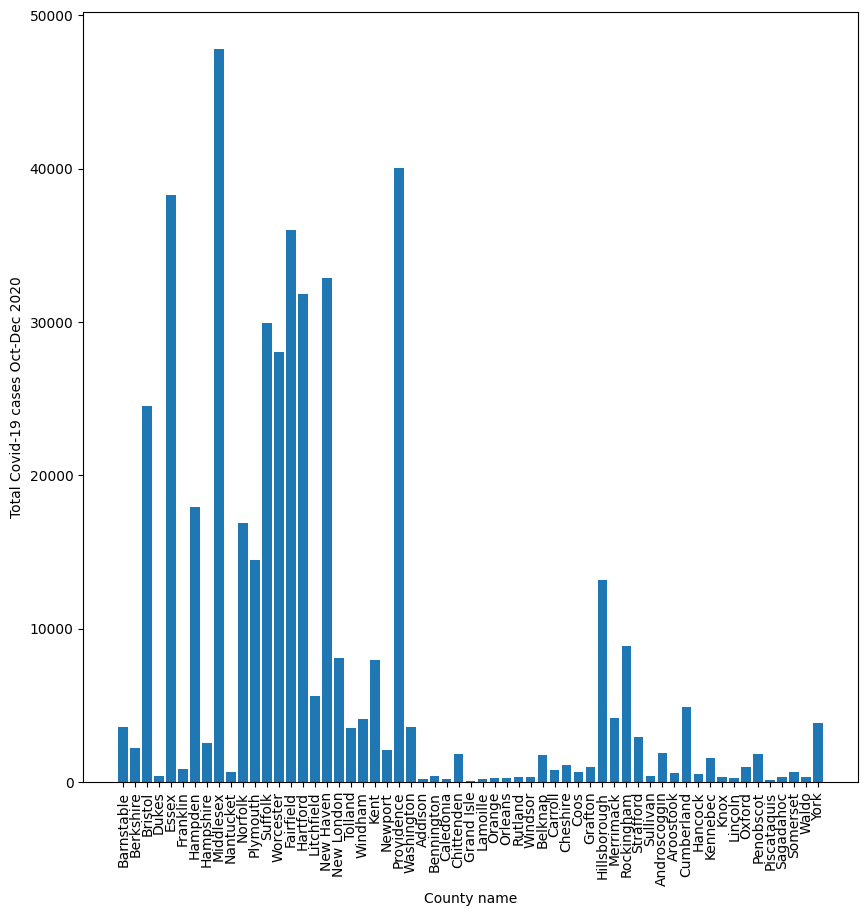

In [78]:
plt.figure(figsize=(10, 10))
plt.bar(data["County name"], data["Total Covid-19 cases Oct-Dec 2020"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("Total Covid-19 cases Oct-Dec 2020")

Text(0, 0.5, 'Population % under age of 18')

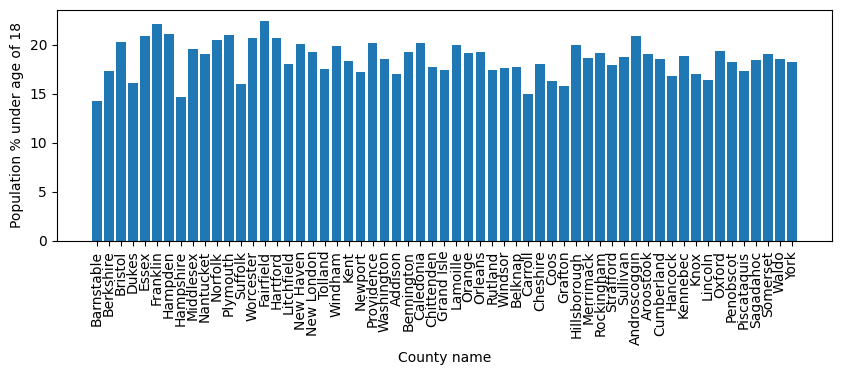

In [79]:
plt.figure(figsize=(10, 3))
plt.bar(data["County name"], data["Population % under age of 18"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("Population % under age of 18")

Text(0, 0.5, 'Diversity Index (%)')

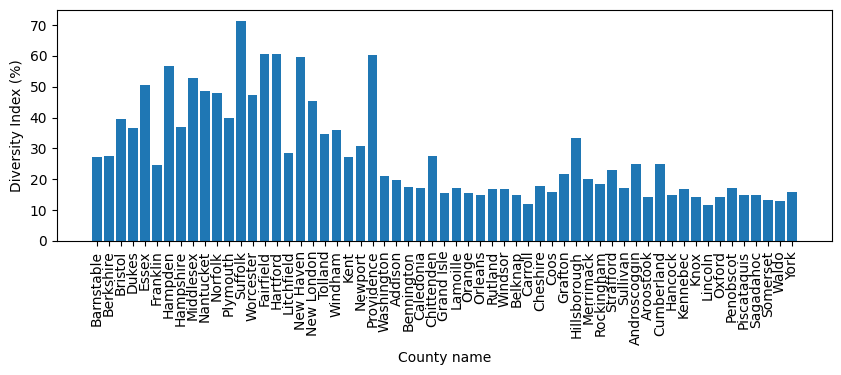

In [80]:
plt.figure(figsize=(10, 3))
plt.bar(data["County name"], data["Diversity Index (%)"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("Diversity Index (%)")

## Plots to show the variation of Covid-19 cases based on percentage of population under age of 18 and diversity index

Text(0, 0.5, 'Population % under age of 18')

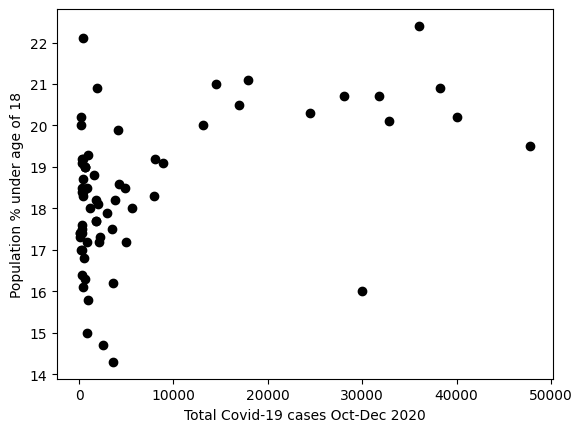

In [47]:
plt.plot( data["Total Covid-19 cases Oct-Dec 2020"],data["Population % under age of 18"], 'ko')
plt.xlabel("Total Covid-19 cases Oct-Dec 2020")
plt.ylabel("Population % under age of 18")

Text(0, 0.5, 'Diversity Index (%)')

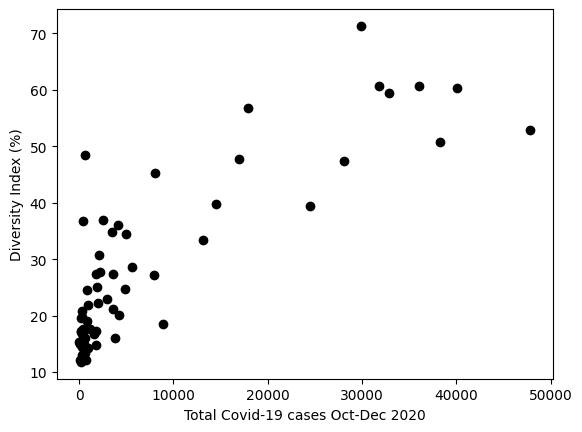

In [48]:
plt.plot( data["Total Covid-19 cases Oct-Dec 2020"],data["Diversity Index (%)"], 'ko')
plt.xlabel("Total Covid-19 cases Oct-Dec 2020")
plt.ylabel("Diversity Index (%)")

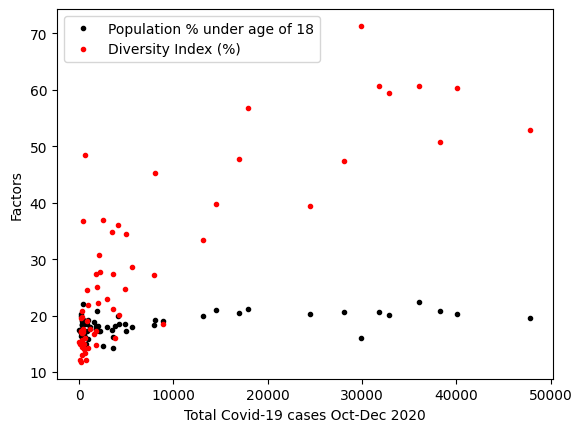

In [83]:
plt.plot( data["Total Covid-19 cases Oct-Dec 2020"],data["Population % under age of 18"], 'ko', markersize = 3)
plt.plot( data["Total Covid-19 cases Oct-Dec 2020"],data["Diversity Index (%)"], 'ro', markersize = 3)
plt.xlabel("Total Covid-19 cases Oct-Dec 2020")
plt.ylabel("Factors")
plt.legend(tuple(['Population % under age of 18','Diversity Index (%)']))

## Plot of chosen factors to qualitatively determine their degree of independence

Text(0, 0.5, 'Diversity Index (%)')

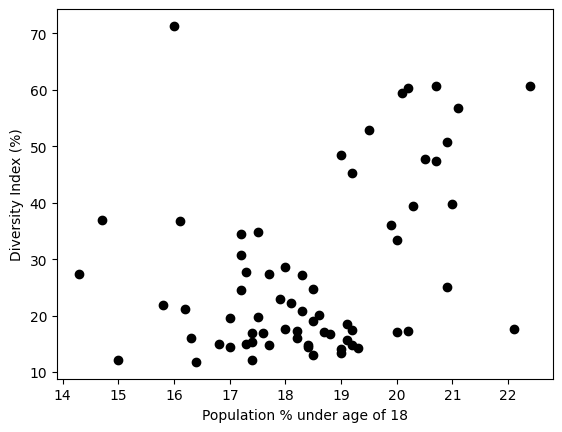

In [84]:
plt.plot( data["Population % under age of 18"],data["Diversity Index (%)"], 'ko')
plt.xlabel("Population % under age of 18")
plt.ylabel("Diversity Index (%)")

## Discretization of data based on factors chosen and displaying data for each category combination

In [85]:
data.loc[data["Population % under age of 18"] < 18, 'group_age'] = 0 
data.loc[data["Population % under age of 18"] >= 18, 'group_age'] = 1
data.loc[data["Diversity Index (%)"] < 25, 'group_diversity'] = 0 
data.loc[data["Diversity Index (%)"] >= 25, 'group_diversity'] = 1

In [86]:
data.loc[(data['group_age'] == 1) & (data['group_diversity'] == 1), 'Group'] = 'Four'
data.loc[(data['group_age'] == 0) & (data['group_diversity'] == 1), 'Group'] = 'Three'
data.loc[(data['group_age'] == 1) & (data['group_diversity'] == 0), 'Group'] = 'Two'
data.loc[(data['group_age'] == 0) & (data['group_diversity'] == 0), 'Group'] = 'One'

In [73]:
data1 = data.loc[data['Group'] == 'One']
data1

,State,County name,Total Covid-19 cases Oct-Dec 2020,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
5,Massachusetts,Franklin,866,17.2,24.6,0.0,0.0,One
26,Rhode Island,Washington,3605,16.2,21.1,0.0,0.0,One
27,Vermont,Addison,185,17.0,19.6,0.0,0.0,One
31,Vermont,Essex,74,17.4,12.1,0.0,0.0,One
33,Vermont,Grand Isle,45,17.4,15.4,0.0,0.0,One
37,Vermont,Rutland,320,17.4,17.0,0.0,0.0,One
39,Vermont,Windham,347,17.5,19.8,0.0,0.0,One
40,Vermont,Windsor,315,17.6,17.0,0.0,0.0,One
41,New Hampshire,Belknap,1785,17.7,14.8,0.0,0.0,One
42,New Hampshire,Carroll,781,15.0,12.1,0.0,0.0,One


In [74]:
data2 = data.loc[data['Group'] == 'Two']
data2

,State,County name,Total Covid-19 cases Oct-Dec 2020,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
22,Rhode Island,Bristol,1989,18.1,22.3,1.0,0.0,Two
28,Vermont,Bennington,385,19.2,17.4,1.0,0.0,Two
29,Vermont,Caledonia,214,20.2,17.2,1.0,0.0,Two
32,Vermont,Franklin,414,22.1,17.7,1.0,0.0,Two
34,Vermont,Lamoille,171,20.0,17.1,1.0,0.0,Two
35,Vermont,Orange,287,19.1,15.6,1.0,0.0,Two
36,Vermont,Orleans,272,19.2,14.8,1.0,0.0,Two
38,Vermont,Washington,806,18.5,19.1,1.0,0.0,Two
43,New Hampshire,Cheshire,1111,18.0,17.7,1.0,0.0,Two
47,New Hampshire,Merrimack,4197,18.6,20.1,1.0,0.0,Two


In [75]:
data3 = data.loc[data['Group'] == 'Three']
data3

,State,County name,Total Covid-19 cases Oct-Dec 2020,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
0,Massachusetts,Barnstable,3597,14.3,27.3,0.0,1.0,Three
1,Massachusetts,Berkshire,2191,17.3,27.7,0.0,1.0,Three
3,Massachusetts,Dukes,419,16.1,36.7,0.0,1.0,Three
7,Massachusetts,Hampshire,2559,14.7,37.0,0.0,1.0,Three
12,Massachusetts,Suffolk,29934,16.0,71.3,0.0,1.0,Three
17,Connecticut,Middlesex,4962,17.2,34.4,0.0,1.0,Three
20,Connecticut,Tolland,3530,17.5,34.8,0.0,1.0,Three
24,Rhode Island,Newport,2065,17.2,30.7,0.0,1.0,Three
30,Vermont,Chittenden,1821,17.7,27.4,0.0,1.0,Three


In [76]:
data4 = data.loc[data['Group'] == 'Four']
data4

,State,County name,Total Covid-19 cases Oct-Dec 2020,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
2,Massachusetts,Bristol,24494,20.3,39.4,1.0,1.0,Four
4,Massachusetts,Essex,38273,20.9,50.7,1.0,1.0,Four
6,Massachusetts,Hampden,17943,21.1,56.7,1.0,1.0,Four
8,Massachusetts,Middlesex,47836,19.5,52.8,1.0,1.0,Four
9,Massachusetts,Nantucket,633,19.0,48.5,1.0,1.0,Four
10,Massachusetts,Norfolk,16912,20.5,47.8,1.0,1.0,Four
11,Massachusetts,Plymouth,14489,21.0,39.8,1.0,1.0,Four
13,Massachusetts,Worcester,28067,20.7,47.3,1.0,1.0,Four
14,Connecticut,Fairfield,36024,22.4,60.6,1.0,1.0,Four
15,Connecticut,Hartford,31806,20.7,60.6,1.0,1.0,Four


### Did counties with higher population of children (age < 18 years) have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

Performing a t-test with null hypothesis that counties with the population of children (age < 18 years) less than 18 % had lower number of Covid-19 cases (less than 10000) during the holiday season of 2020

### Did counties with higher diversity index have higher number of Covid-19 cases during the holiday season (October - December) of the year 2020?

Performing a t-test with null hypothesis that counties with the diversity index greater than 25 % had higher number of Covid-19 cases (greater than 10000) during the holiday season of 2020

### Did counties with lower diversity index and lower population of children have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

Using linear algebra to determine if lower population of children, higher diversity index, in the counties of the New England region during the holiday season of the year 2020 or a combination of both is associated with higher number Covid-19 cases